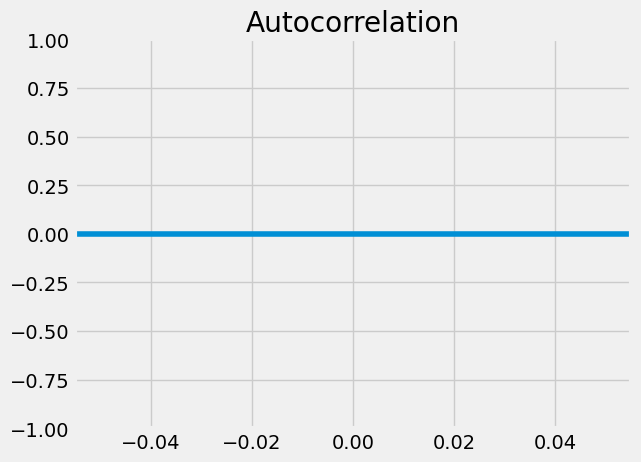

In [41]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots
co2_levels = pd.read_csv('./ch2_co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

In [42]:
co2_levels


,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


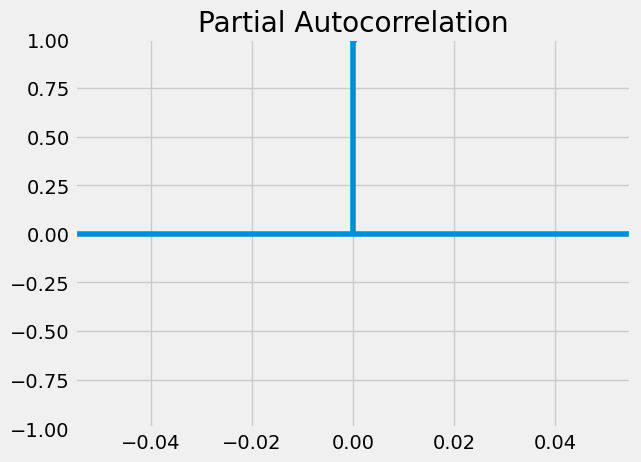

In [43]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

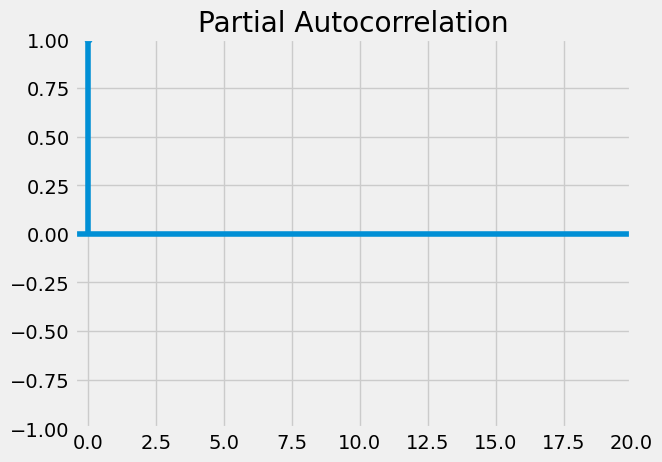

In [44]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=20) # Update lags parameter to 20
plt.xlim([-0.5,20]) # Set the X-axis limit between 0-20

# Show plot
plt.show()

In [45]:
co2_levels = co2_levels.asfreq('D').fillna(method='bfill')

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_45460\1959427321.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co2_levels = co2_levels.asfreq('D').fillna(method='bfill')


In [46]:
# Import statsmodels.api as sm
import statsmodels.api as sm
# co2_levels = co2_levels.co2.diff()
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29   -0.010190
1958-03-30    0.010169
1958-03-31    0.006776
1958-04-01    0.003456
1958-04-02   -0.000011
                ...   
2001-12-25    0.003456
2001-12-26   -0.000011
2001-12-27   -0.003404
2001-12-28   -0.006797
2001-12-29   -0.010190
Freq: D, Name: seasonal, Length: 15982, dtype: float64


In [48]:
decomposition.trend

datestamp
1958-03-29           NaN
1958-03-30           NaN
1958-03-31           NaN
1958-04-01    317.128571
1958-04-02    317.300000
                 ...    
2001-12-25    371.471429
2001-12-26    371.500000
2001-12-27           NaN
2001-12-28           NaN
2001-12-29           NaN
Freq: D, Name: trend, Length: 15982, dtype: float64

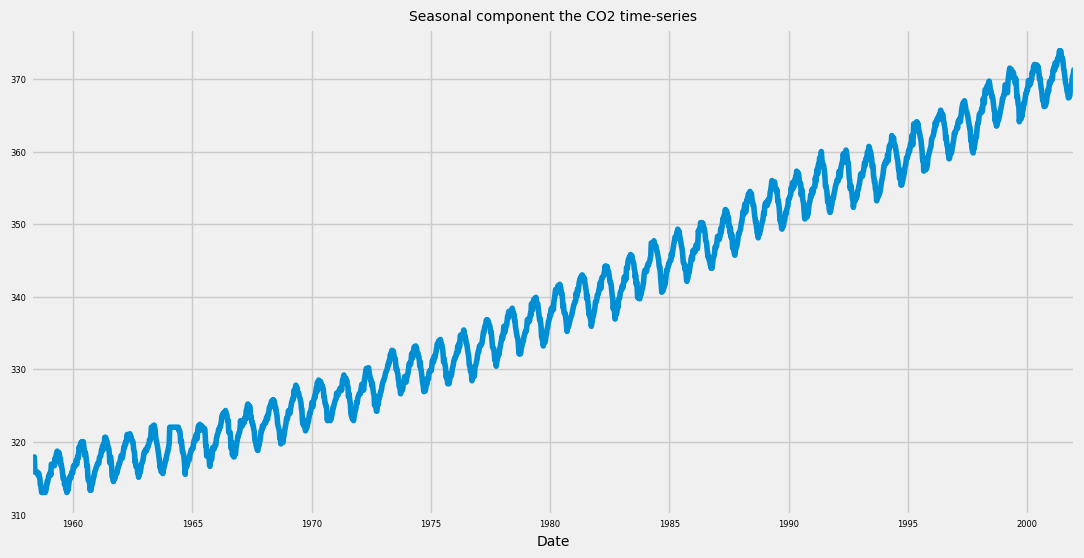

In [50]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [52]:
observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid

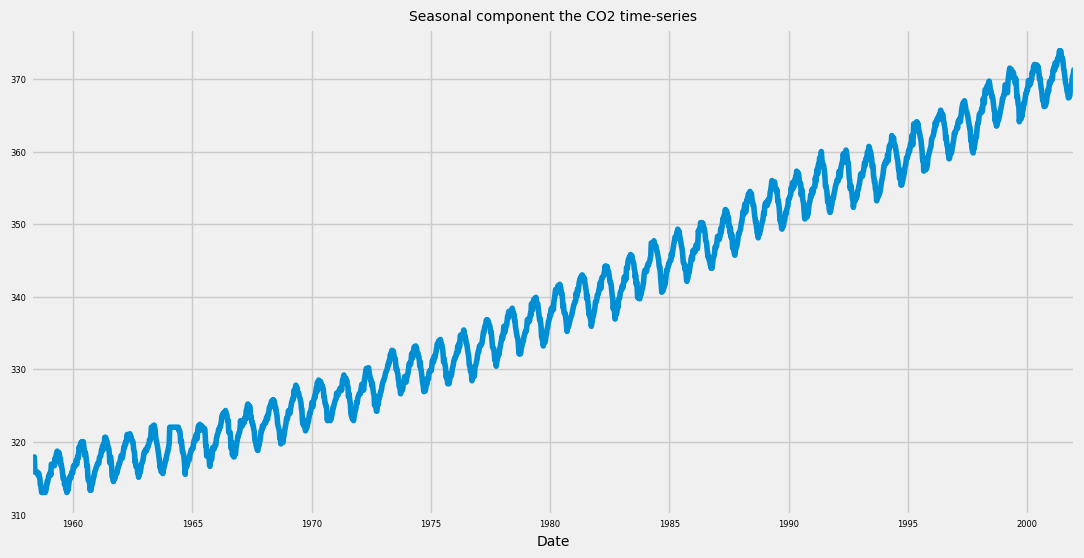

In [53]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

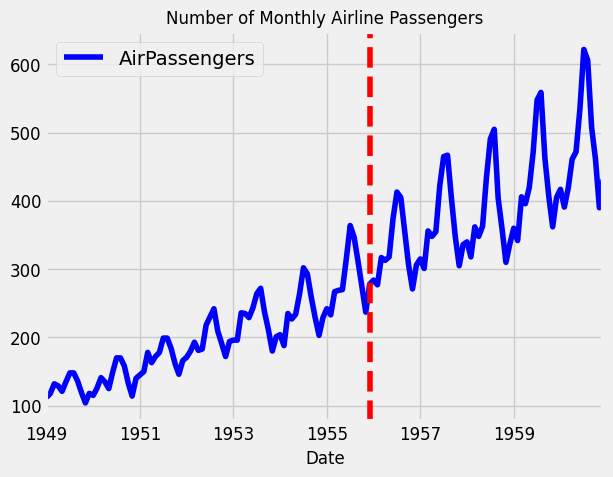

In [54]:
airline = pd.read_csv('./ch3_airline_passengers.csv', parse_dates=['Month'], index_col='Month')
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


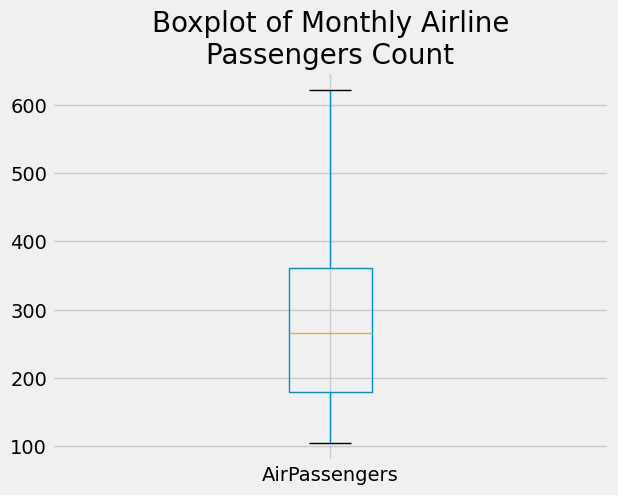

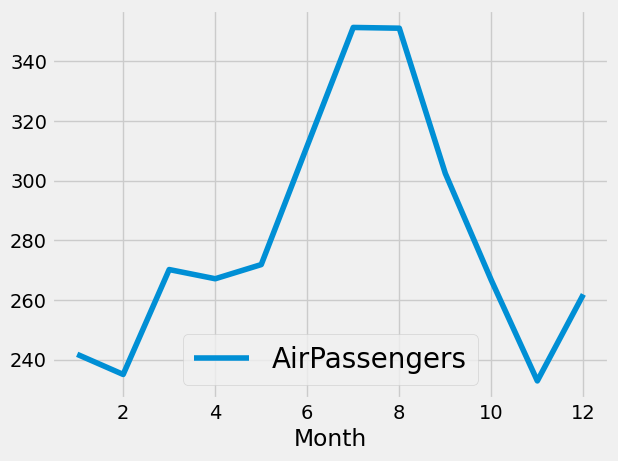

In [55]:
##
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

##
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

##
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


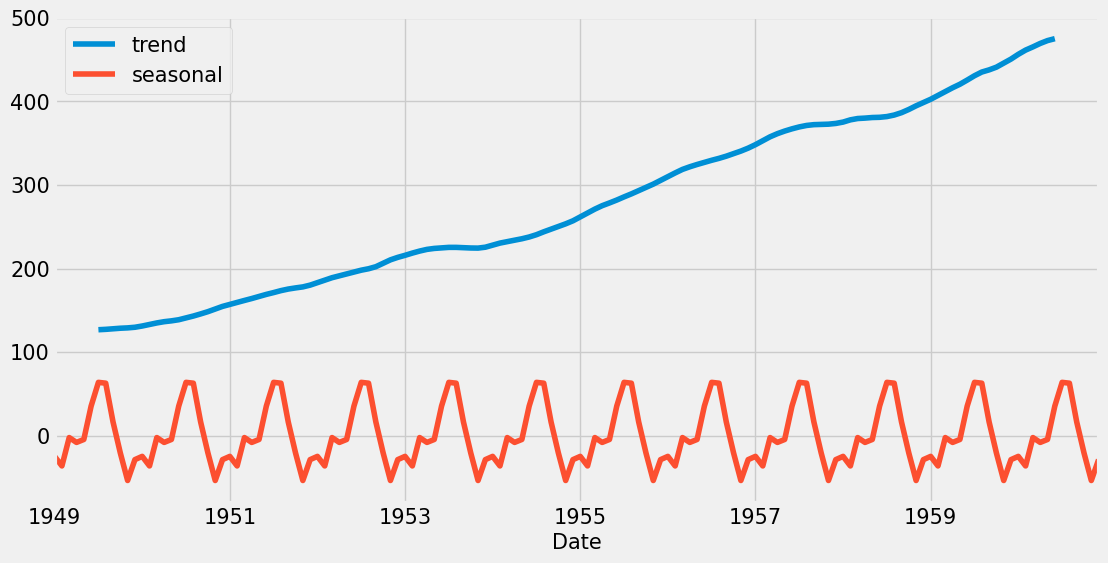

In [56]:
##
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

airline_decomposed = pd.concat([trend, seasonal], axis=1)
##
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()